# Scenario with building limiting the view

In [1]:
import sys  
sys.path.insert(0, 'src/')

from commonroad.common.file_reader import CommonRoadFileReader
from simulate_trajectory import step_simulation
from visualizer import Visualizer
import yaml
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import os

### Plot function used for the visualizations

In [2]:
def plot(time_step, ego_vehicle, scenarios, sensor_views, ext_sensor_views=None, delay=0):
    plt.cla()
    if ext_sensor_views==None or (time_step-delay) < 0:
        Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step)
    else:
        Visualizer().plot(scenario=scenarios[time_step],
                  sensor_view=sensor_views[time_step],
                  ego_vehicle=scenarios[time_step].obstacle_by_id(ego_vehicle.obstacle_id),
                  time_begin=time_step,
                  ext_sensor_view=ext_sensor_views[time_step-delay])
    plt.axis('scaled')
    plt.xlim(0,160)
    plt.ylim(-40,40)

### Import the scenario and the config files

In [3]:
scenario, _ = CommonRoadFileReader("scenario_building/DEU_Ffb-1_4_recreation.xml").open()

with open("scenario_building/config1_no_tracking_no_sharing.yaml") as file:
    config1 = yaml.load(file, Loader=yaml.FullLoader)
with open("scenario_building/config2_tracking_no_sharing.yaml") as file:
    config2 = yaml.load(file, Loader=yaml.FullLoader)
with open("scenario_building/config3_no_tracking_sharing.yaml") as file:
    config3 = yaml.load(file, Loader=yaml.FullLoader)
with open("scenario_building/config4_tracking_sharing.yaml") as file:
    config4 = yaml.load(file, Loader=yaml.FullLoader)

/home/jmgs/miniconda3/envs/shared_occlusions/lib/python3.8/site-packages/commonroad/scenario/lanelet.py:1263: ShapelyDeprecationWarning: STRtree will be changed in 2.0.0 and will not be compatible with versions < 2.
  self._strtee = STRtree(list(self._buffered_polygons.values()))


### Simulations (It will take some time)

In [4]:
ego_vehicle1, scenarios1, sensor_views1, ext_sensor_scenarios1, ext_sensor_views1 = step_simulation(scenario, config1)
ego_vehicle2, scenarios2, sensor_views2, ext_sensor_scenarios2, ext_sensor_views2 = step_simulation(scenario, config2)
ego_vehicle3, scenarios3, sensor_views3, ext_sensor_scenarios3, ext_sensor_views3 = step_simulation(scenario, config3)
ego_vehicle4, scenarios4, sensor_views4, ext_sensor_scenarios4, ext_sensor_views4 = step_simulation(scenario, config4)

### Plots (Same as Figure 5 in the paper)

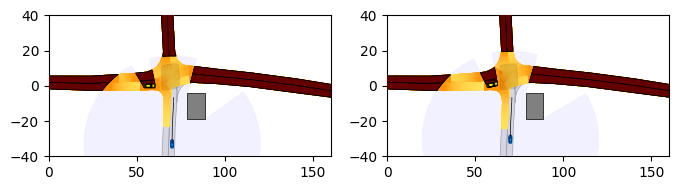

In [5]:
t1 = 0
t2 = 3
delay = config1.get('ext_sensor_delay')
fig, ax = plt.subplots(1, 2)
plt.sca(ax[0])
plot(t1, ego_vehicle1, scenarios1, sensor_views1, ext_sensor_views1, delay)
plt.sca(ax[1])
plot(t2, ego_vehicle1, scenarios1, sensor_views1, ext_sensor_views1, delay)

### Animation

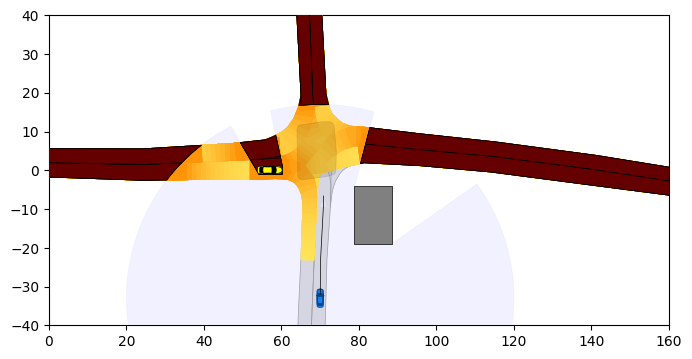

In [6]:
fig = plt.figure(figsize=(10, 10))
anim = animation.FuncAnimation(fig, plot, fargs=[ego_vehicle1, scenarios1, sensor_views1, ext_sensor_views1, delay], frames=len(scenarios1), interval=100, blit=False)
HTML(anim.to_html5_video())

## Plots

In [7]:
scenario_folder = os.path.abspath(r'scenario_building')
fig_folder = os.path.join(scenario_folder, r'figs')
viz = Visualizer()

### Velocity comparison

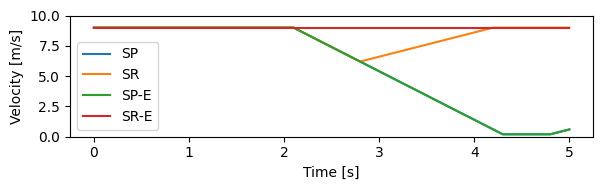

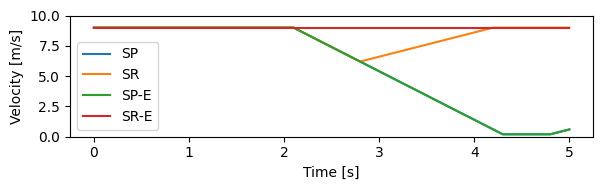

In [8]:
viz.save_velocity_comparison_plot([ego_vehicle1, ego_vehicle2, ego_vehicle3, ego_vehicle4],
                                  ['SP','SR', 'SP-E', 'SR-E'], 
                                  fig_folder + '/test_velocity_comparison.png')
viz.save_velocity_comparison_plot([ego_vehicle1, ego_vehicle2, ego_vehicle3, ego_vehicle4],
                                  ['SP','SR', 'SP-E', 'SR-E'], 
                                  fig_folder + '/test_velocity_comparison.svg')

### Scenario snapshots

/home/jmgs/share_the_unseen/src/visualizer.py:50: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(fig_width, fig_width*yx_ratio))


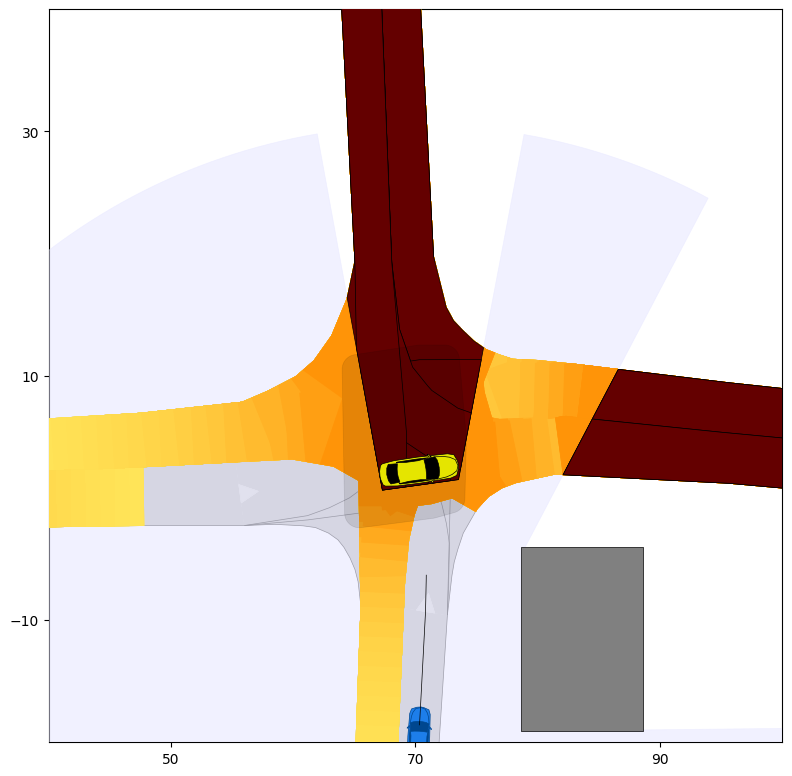

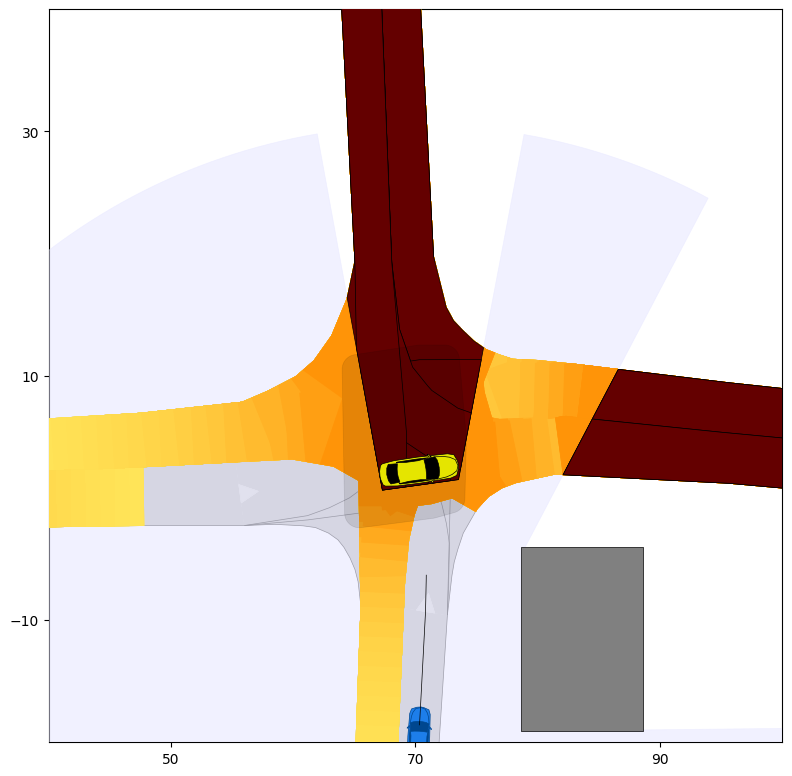

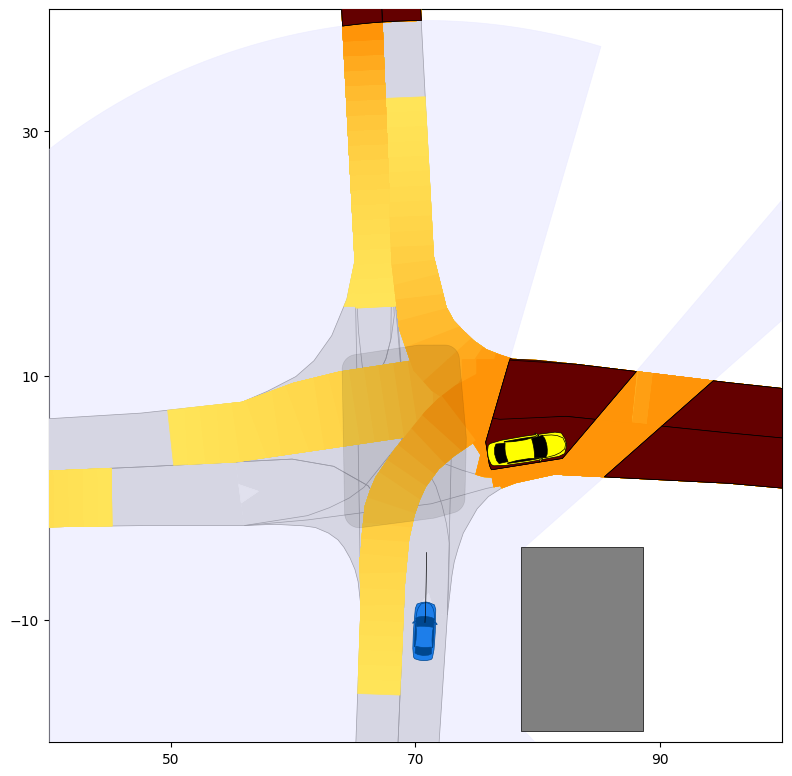

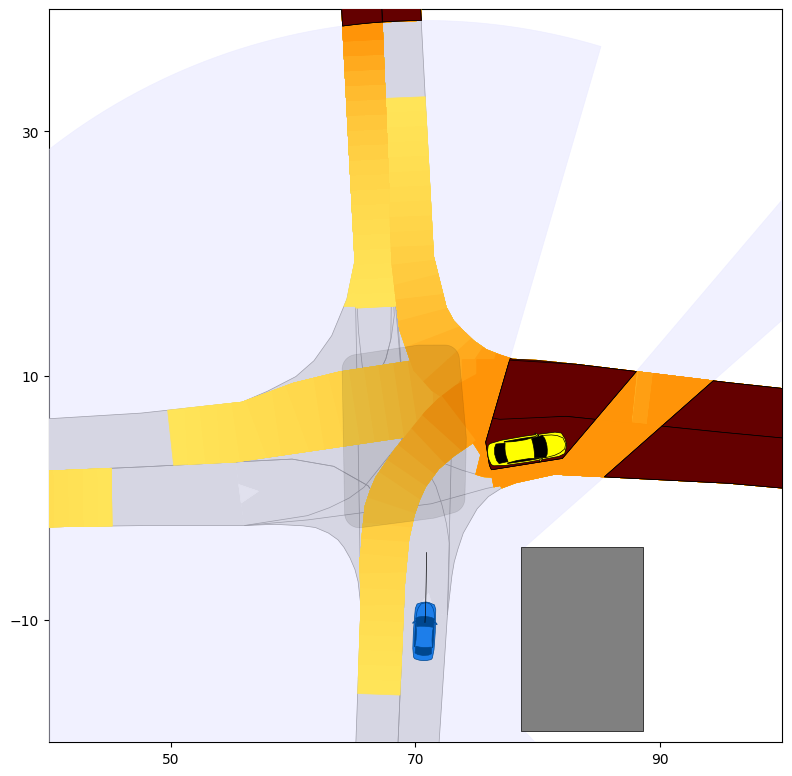

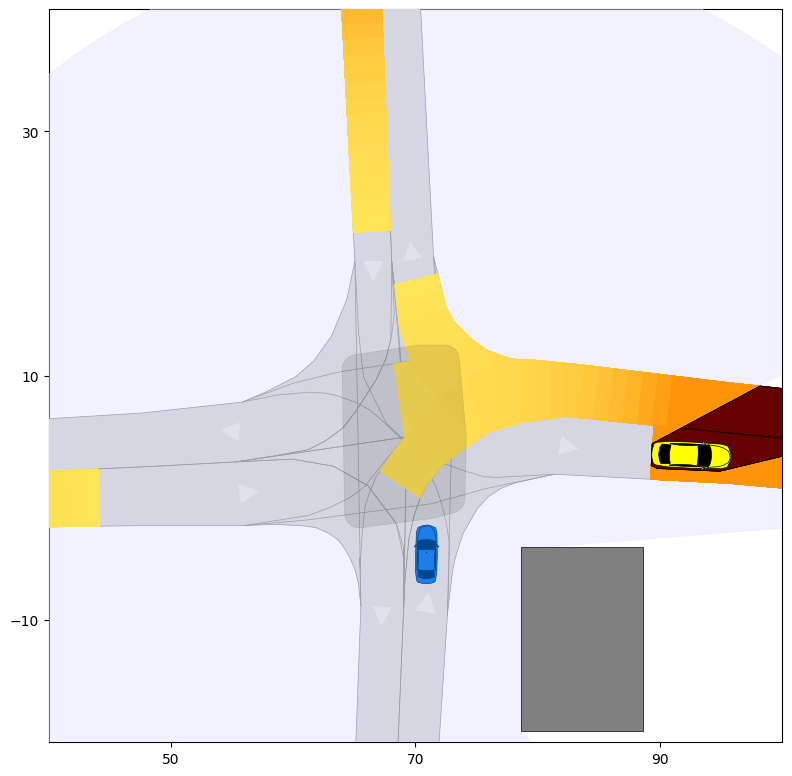

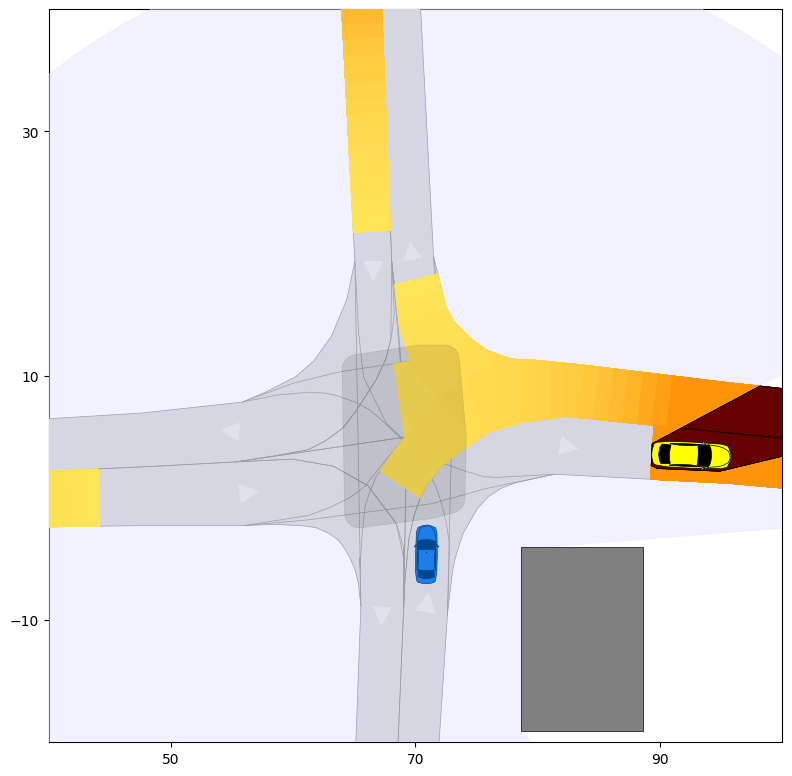

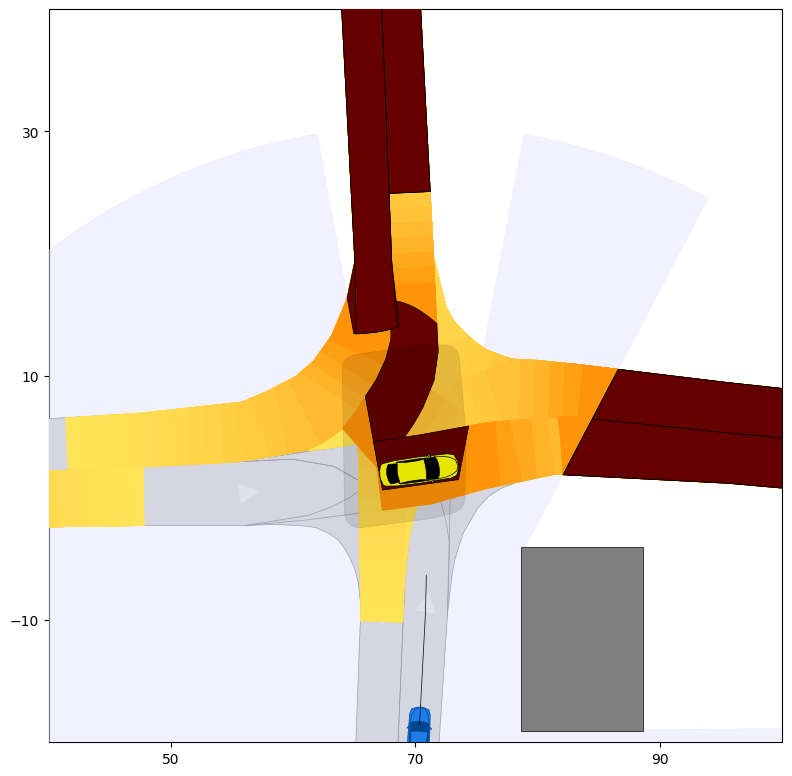

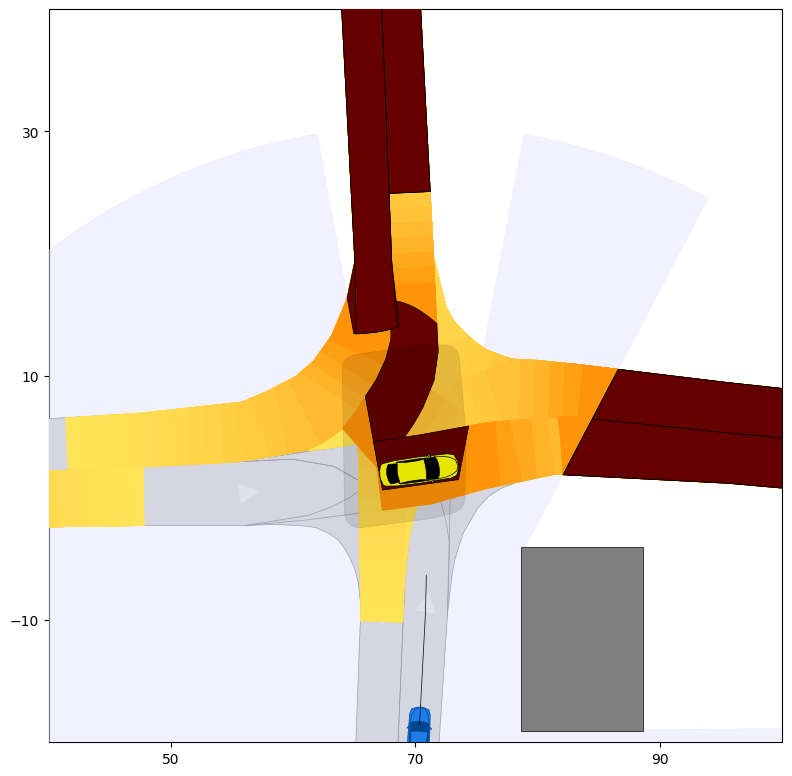

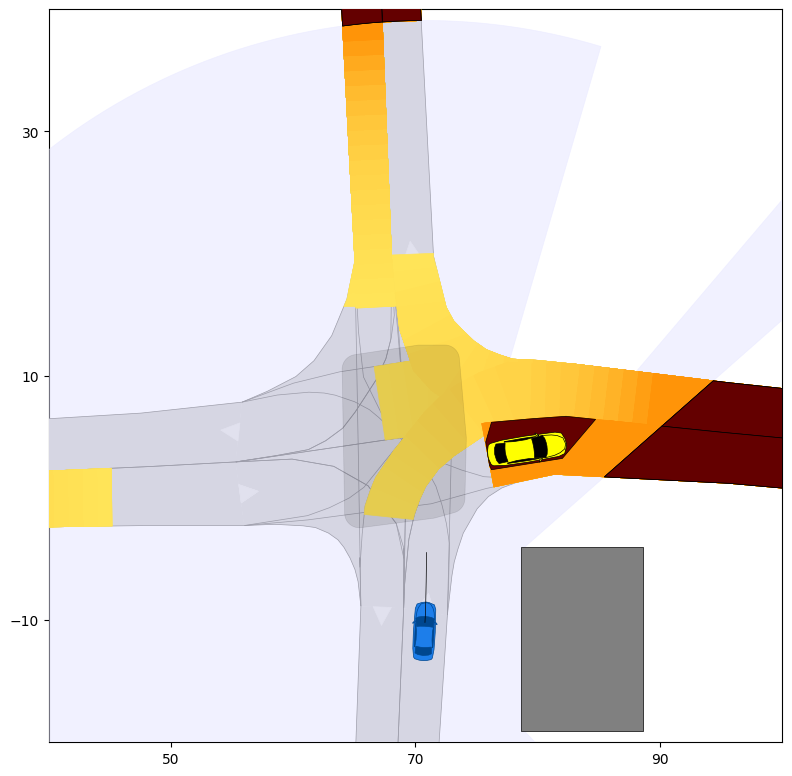

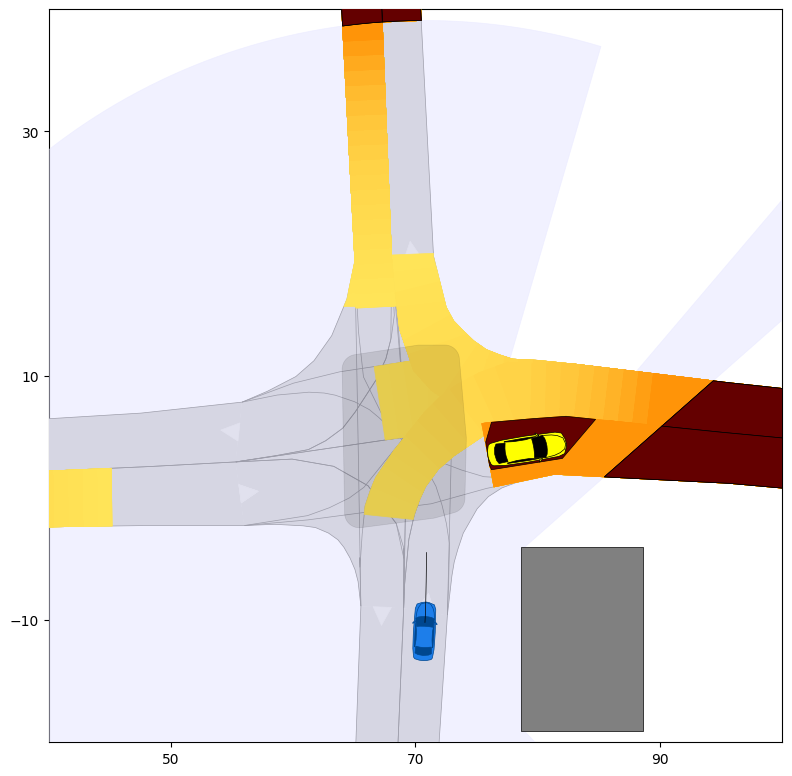

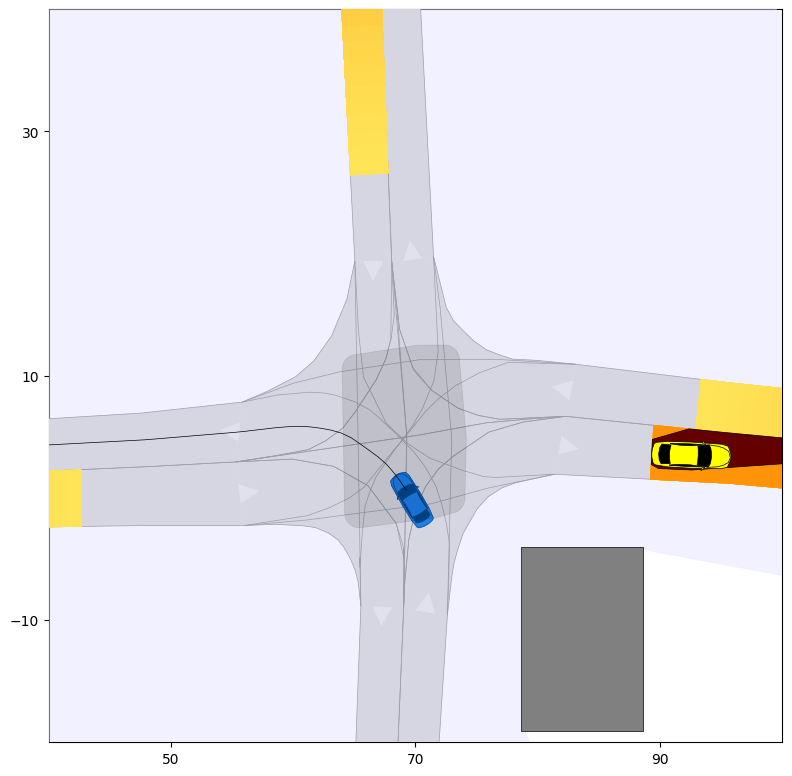

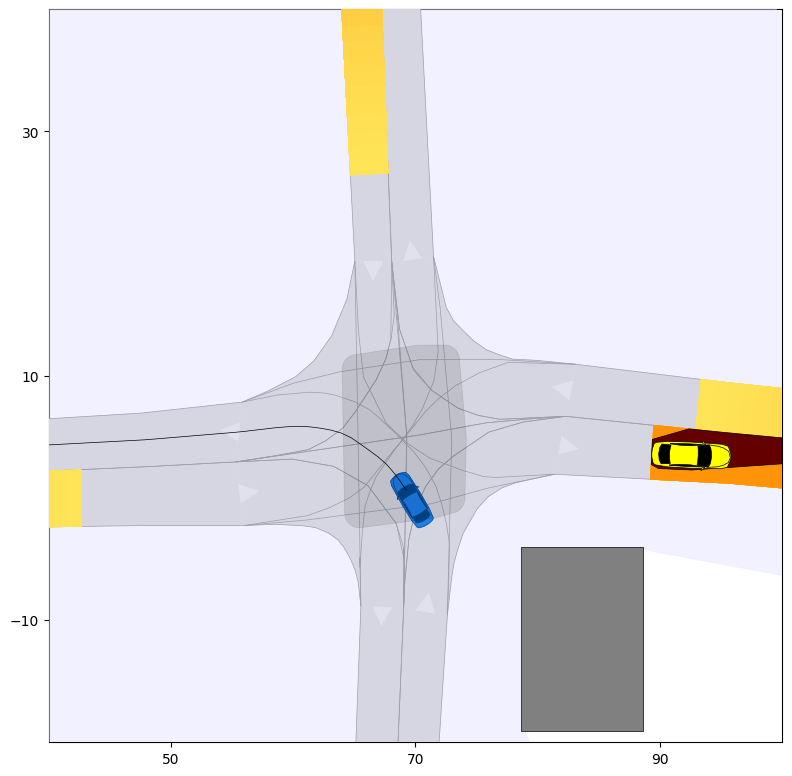

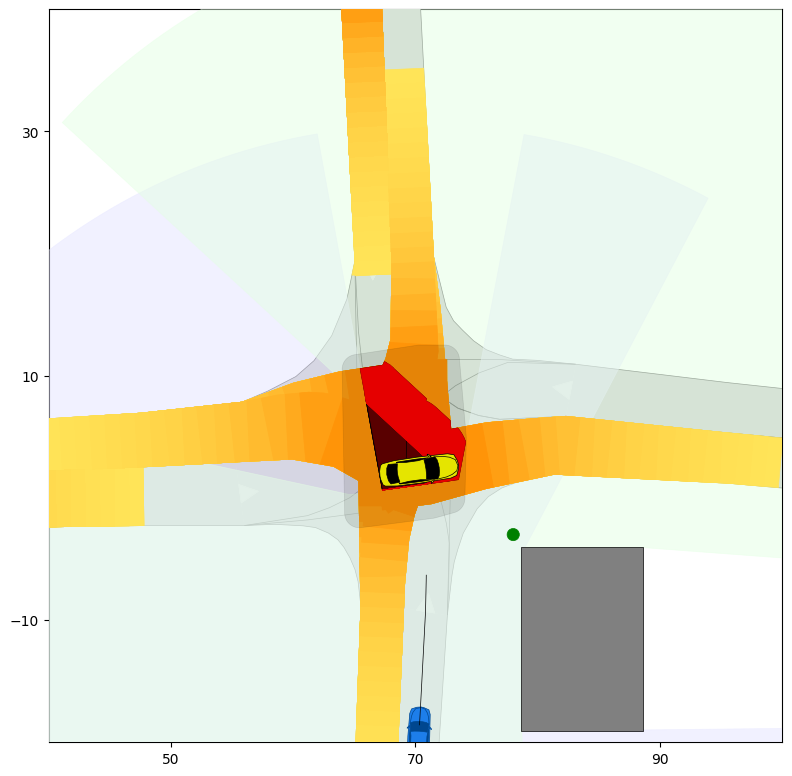

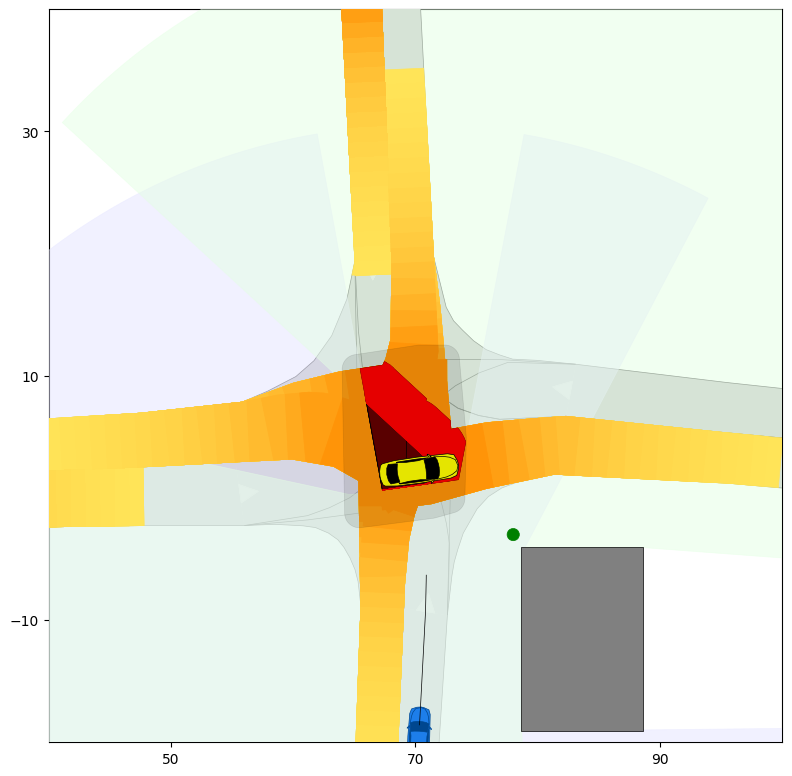

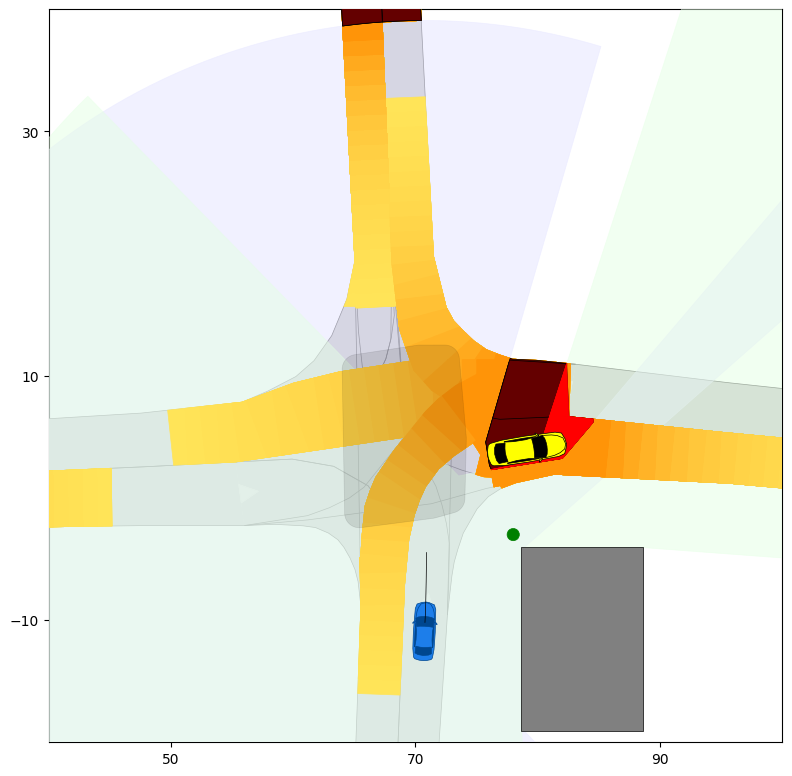

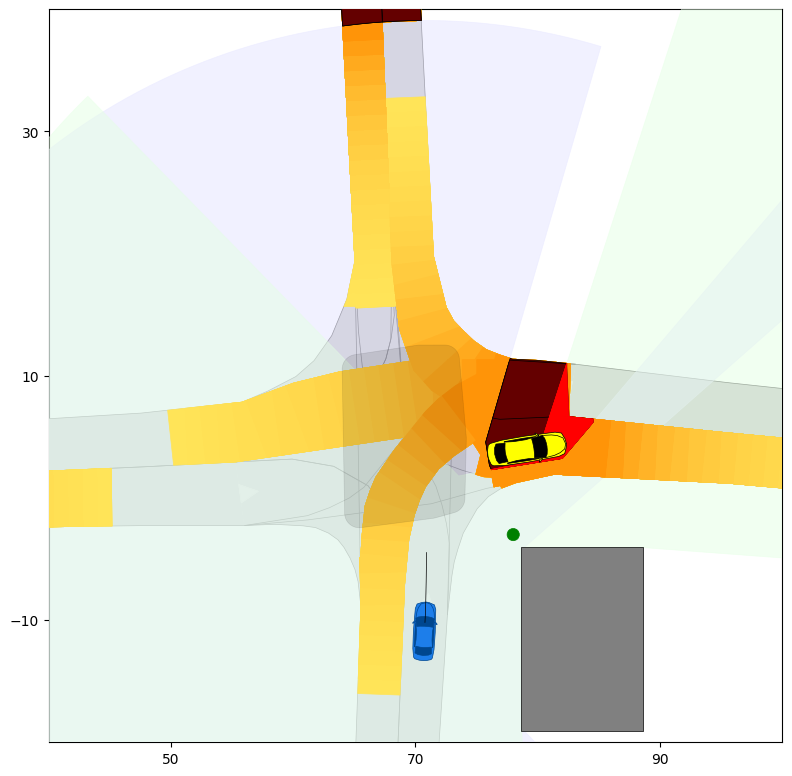

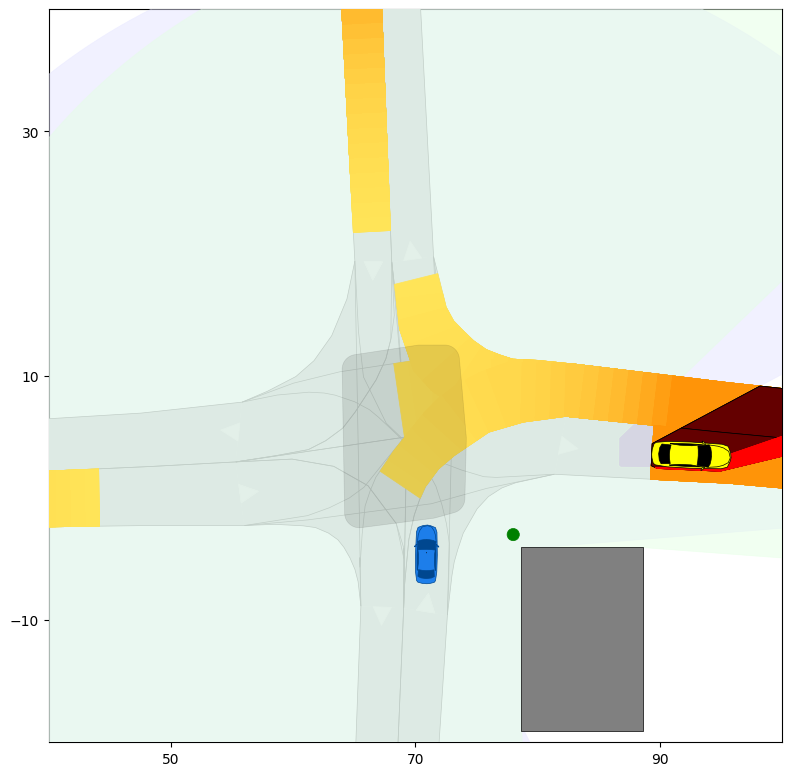

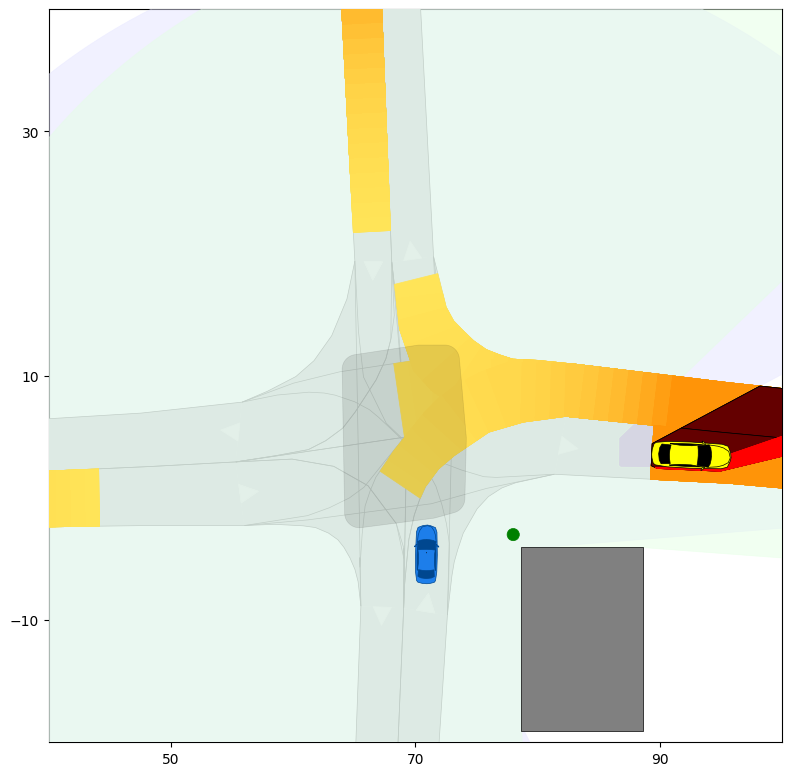

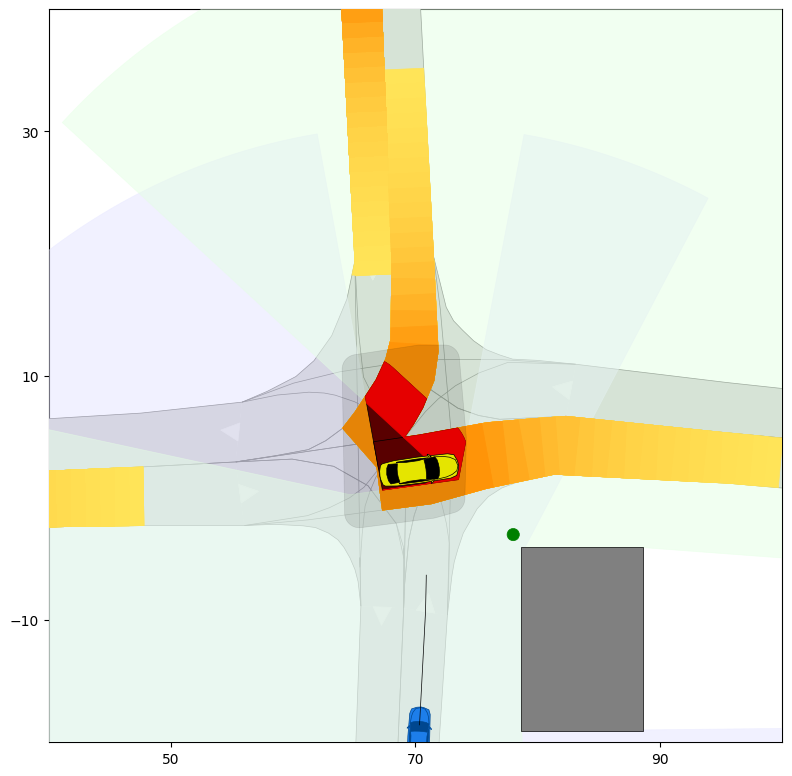

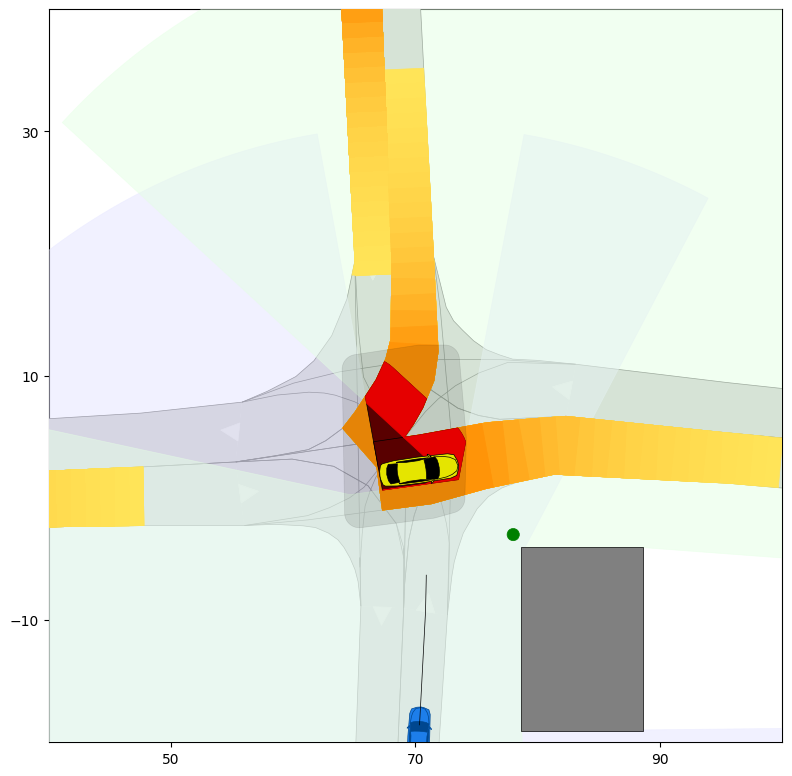

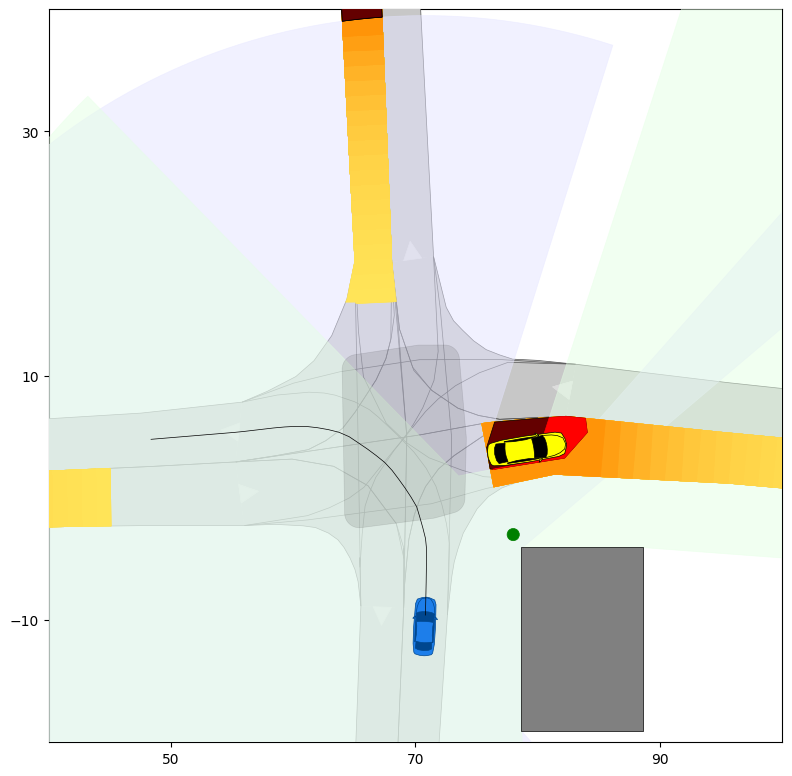

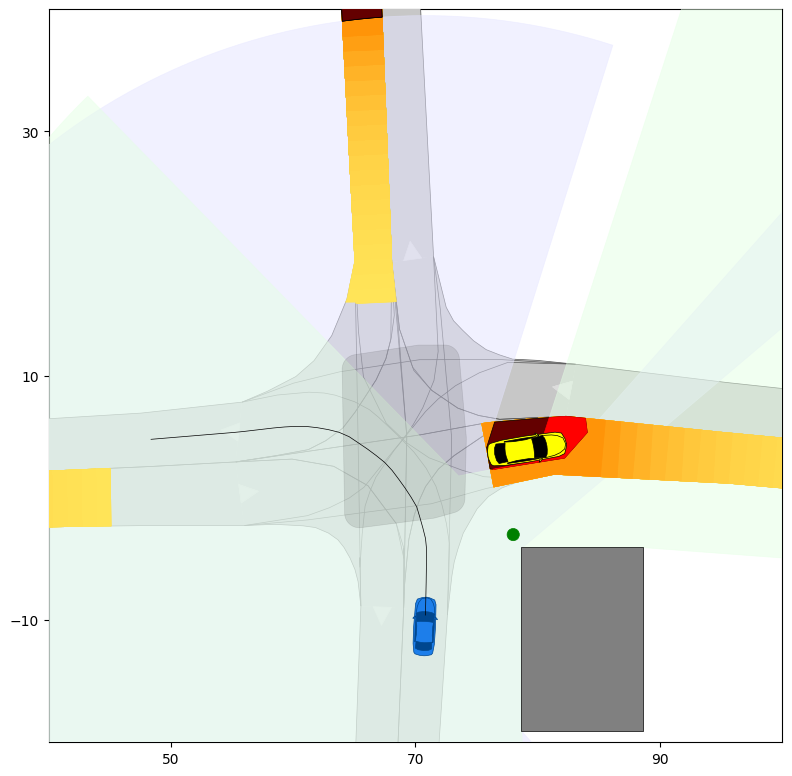

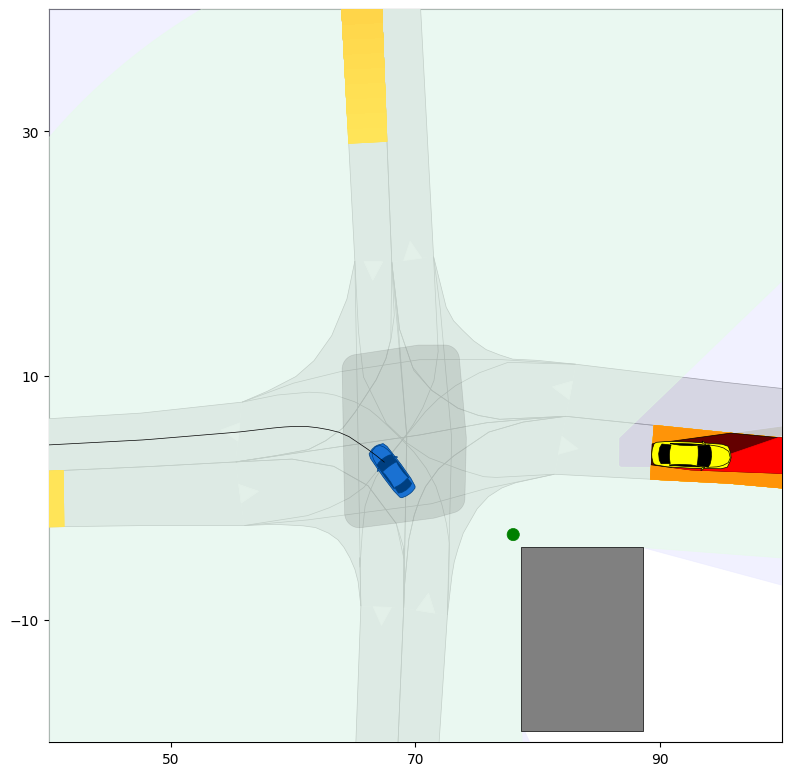

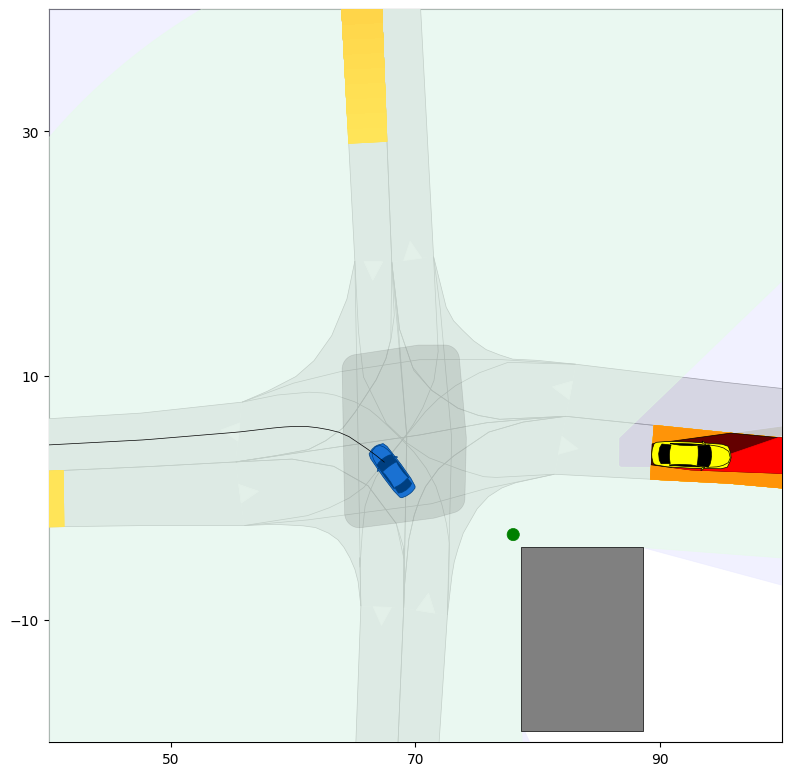

In [9]:
t1 = 15
t2 = 25
t3 = 40

xylimits = [40,100,-20, 40]
xticks = [50,70,90]
yticks = [-10,10,30]
figure_width = 3

for idx, (scenarios, sensor_views, ego_vehicle, ext_sensor_views, config) in enumerate(zip([scenarios1, scenarios2, scenarios3, scenarios4], [sensor_views1, sensor_views2, sensor_views3, sensor_views4], [ego_vehicle1, ego_vehicle2, ego_vehicle3, ego_vehicle4], [ext_sensor_views1, ext_sensor_views2, ext_sensor_views3, ext_sensor_views4], [config1, config2, config3, config4])):
    for t in [t1, t2, t3]:
        if config.get('ext_sensor') is True:
            ext_sensor_pos = [config.get('ext_sensor_x'), config.get('ext_sensor_y')]
        else:
            ext_sensor_pos = None
        delay = config.get('ext_sensor_delay')
        viz.save_snapshot_plot(scenarios[t],
                               sensor_views[t],
                               ego_vehicle.obstacle_id,
                               fig_folder + '/scenario' + str(idx+1) + '_t' + str(t) + '.png',
                               xylimits, xticks, yticks, figure_width, ext_sensor_views[t-delay], ext_sensor_pos = ext_sensor_pos)
        viz.save_snapshot_plot(scenarios[t],
                               sensor_views[t],
                               ego_vehicle.obstacle_id,
                               fig_folder + '/scenario' + str(idx+1) + '_t' + str(t) + '.svg',
                               xylimits, xticks, yticks, figure_width, ext_sensor_views[t-delay], ext_sensor_pos = ext_sensor_pos)


